In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
import time
from scipy import stats
from scipy.stats import linregress

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [7]:
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# city_weather = requests.get(city_url)
# city_weather

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a9ed58a798c9db1f29eb000ba1ac680


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | atar
Processing Record 2 of Set 13 | provideniya
Processing Record 3 of Set 13 | bargal
City not found. Skipping...
Processing Record 4 of Set 13 | east london
Processing Record 5 of Set 13 | puerto ayora
Processing Record 6 of Set 13 | constitucion
Processing Record 7 of Set 13 | jamestown
Processing Record 8 of Set 13 | murgab
Processing Record 9 of Set 13 | chuy
Processing Record 10 of Set 13 | pangnirtung
Processing Record 11 of Set 13 | schmallenberg
Processing Record 12 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 13 of Set 13 | jijiga
Processing Record 14 of Set 13 | faanui
Processing Record 15 of Set 13 | victoria point
Processing Record 16 of Set 13 | atbasar
Processing Record 17 of Set 13 | ushuaia
Processing Record 18 of Set 13 | pore
Processing Record 19 of Set 13 | mataura
Processing Record 20 of Set 13 | pahrump
Processing Record 21 of Set 13 | tasiilaq
Pr

Processing Record 31 of Set 16 | manakara
Processing Record 32 of Set 16 | iwaki
Processing Record 33 of Set 16 | hithadhoo
Processing Record 34 of Set 16 | norman wells
Processing Record 35 of Set 16 | luau
Processing Record 36 of Set 16 | ler
Processing Record 37 of Set 16 | smolenka
Processing Record 38 of Set 16 | labuhan
Processing Record 39 of Set 16 | tiksi
Processing Record 40 of Set 16 | kavieng
Processing Record 41 of Set 16 | tuatapere
Processing Record 42 of Set 16 | necochea
Processing Record 43 of Set 16 | lichinga
Processing Record 44 of Set 16 | carutapera
Processing Record 45 of Set 16 | ordynskoye
Processing Record 46 of Set 16 | samusu
City not found. Skipping...
Processing Record 47 of Set 16 | padang
Processing Record 48 of Set 16 | husavik
Processing Record 49 of Set 16 | dunedin
Processing Record 50 of Set 16 | ometepec
Processing Record 1 of Set 17 | kysyl-syr
Processing Record 2 of Set 17 | karakendzha
City not found. Skipping...
Processing Record 3 of Set 17 |

City not found. Skipping...
Processing Record 15 of Set 20 | louisbourg
City not found. Skipping...
Processing Record 16 of Set 20 | black river
Processing Record 17 of Set 20 | cranbrook
Processing Record 18 of Set 20 | woodway
Processing Record 19 of Set 20 | meyungs
City not found. Skipping...
Processing Record 20 of Set 20 | jinka
Processing Record 21 of Set 20 | salalah
Processing Record 22 of Set 20 | mys shmidta
City not found. Skipping...
Processing Record 23 of Set 20 | dzhebariki-khaya
Processing Record 24 of Set 20 | banda aceh
Processing Record 25 of Set 20 | maceio
Processing Record 26 of Set 20 | paka
Processing Record 27 of Set 20 | pathein
Processing Record 28 of Set 20 | nemuro
Processing Record 29 of Set 20 | bowen
Processing Record 30 of Set 20 | pringsewu
Processing Record 31 of Set 20 | sumbawa
City not found. Skipping...
Processing Record 32 of Set 20 | sistranda
Processing Record 33 of Set 20 | saint-pierre
Processing Record 34 of Set 20 | mount gambier
Processin

Processing Record 1 of Set 24 | linhares
Processing Record 2 of Set 24 | amapa
Processing Record 3 of Set 24 | lucea
Processing Record 4 of Set 24 | alice springs
Processing Record 5 of Set 24 | macaboboni
City not found. Skipping...
Processing Record 6 of Set 24 | plettenberg bay
Processing Record 7 of Set 24 | lusambo
Processing Record 8 of Set 24 | kentau
Processing Record 9 of Set 24 | praia
Processing Record 10 of Set 24 | touros
Processing Record 11 of Set 24 | san lorenzo
Processing Record 12 of Set 24 | ketchikan
Processing Record 13 of Set 24 | gimli
Processing Record 14 of Set 24 | buritis
Processing Record 15 of Set 24 | prince rupert
Processing Record 16 of Set 24 | imaculada
Processing Record 17 of Set 24 | soe
Processing Record 18 of Set 24 | sabang
Processing Record 19 of Set 24 | mae sai
Processing Record 20 of Set 24 | nabire
Processing Record 21 of Set 24 | yukhnov
Processing Record 22 of Set 24 | januaria
Processing Record 23 of Set 24 | dori
Processing Record 24 of 

In [9]:
len(city_data)

564

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atar,20.52,-13.05,81.27,15,0,9.44,MR,2020-04-14 22:07:16
1,Provideniya,64.38,-173.30,30.20,80,90,13.42,RU,2020-04-14 22:02:58
2,East London,-33.02,27.91,65.12,71,100,4.25,ZA,2020-04-14 22:04:06
3,Puerto Ayora,-0.74,-90.35,86.00,66,75,6.93,EC,2020-04-14 22:04:38
4,Constitucion,-35.33,-72.42,62.37,50,13,10.80,CL,2020-04-14 22:03:27
5,Jamestown,42.10,-79.24,41.00,41,90,11.41,US,2020-04-14 22:02:55
6,Murgab,37.50,61.97,50.00,76,75,13.87,TM,2020-04-14 22:08:14
7,Chuy,-33.70,-53.46,58.75,87,100,25.28,UY,2020-04-14 22:03:39
8,Pangnirtung,66.15,-65.71,12.20,78,20,4.70,CA,2020-04-14 22:05:34
9,Schmallenberg,51.15,8.30,39.99,69,24,3.36,DE,2020-04-14 22:08:14


In [11]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atar,MR,2020-04-14 22:07:16,20.52,-13.05,81.27,15,0,9.44
1,Provideniya,RU,2020-04-14 22:02:58,64.38,-173.30,30.20,80,90,13.42
2,East London,ZA,2020-04-14 22:04:06,-33.02,27.91,65.12,71,100,4.25
3,Puerto Ayora,EC,2020-04-14 22:04:38,-0.74,-90.35,86.00,66,75,6.93
4,Constitucion,CL,2020-04-14 22:03:27,-35.33,-72.42,62.37,50,13,10.80


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

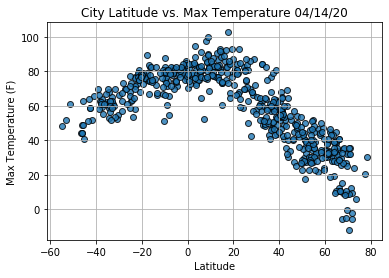

In [15]:
today = time.strftime("%x")
today 
# 
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

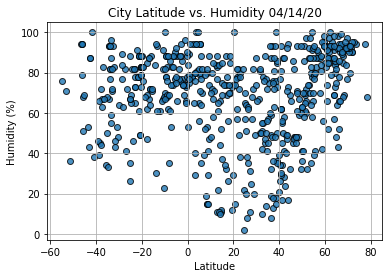

In [16]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

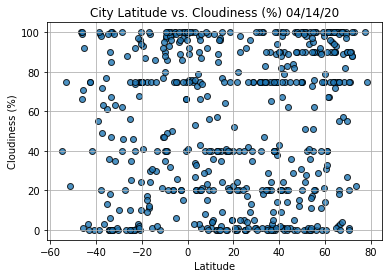

In [17]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

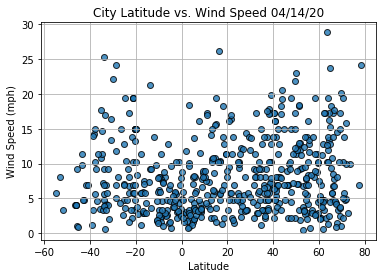

In [18]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    


In [34]:
index13 = city_data_df.loc[13]
index13

City                      Atbasar
Country                        KZ
Date          2020-04-14 22:08:15
Lat                          51.8
Lng                         68.33
Max Temp                     36.5
Humidity                       72
Cloudiness                     28
Wind Speed                  12.95
Name: 13, dtype: object

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atar,MR,2020-04-14 22:07:16,20.52,-13.05,81.27,15,0,9.44
1,Provideniya,RU,2020-04-14 22:02:58,64.38,-173.30,30.20,80,90,13.42
5,Jamestown,US,2020-04-14 22:02:55,42.10,-79.24,41.00,41,90,11.41
6,Murgab,TM,2020-04-14 22:08:14,37.50,61.97,50.00,76,75,13.87
8,Pangnirtung,CA,2020-04-14 22:05:34,66.15,-65.71,12.20,78,20,4.70
...,...,...,...,...,...,...,...,...,...
557,Koidu,SL,2020-04-14 22:11:08,8.42,-10.83,76.95,82,92,3.44
558,Shenjiamen,CN,2020-04-14 22:11:08,29.96,122.30,55.40,87,100,11.90
560,Gat,IL,2020-04-14 22:06:31,31.61,34.76,64.40,82,75,2.24
562,Pabbi,PK,2020-04-14 22:11:10,34.01,71.80,64.40,88,75,9.17


In [36]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

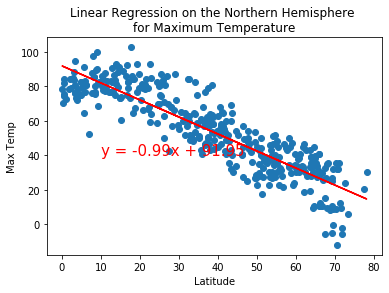

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))


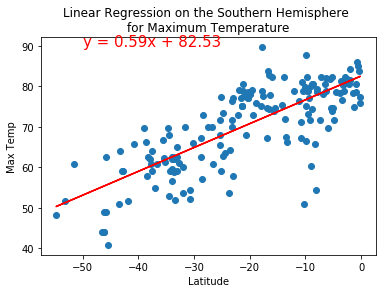

In [38]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

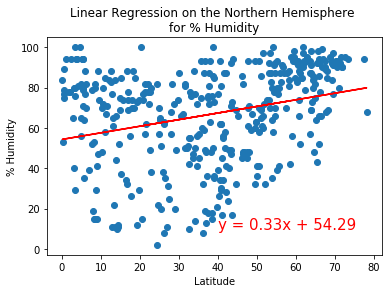

In [39]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

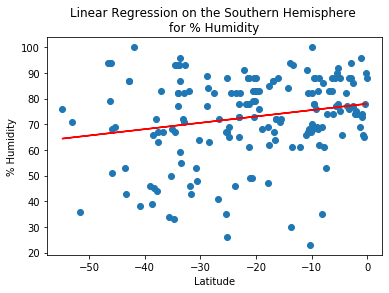

In [41]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

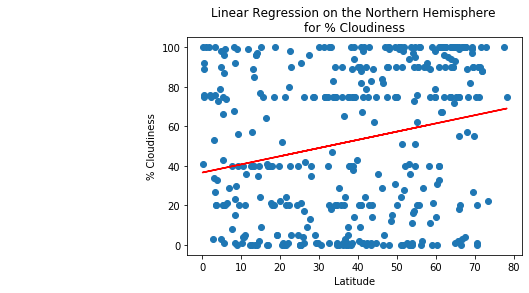

In [42]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,15))

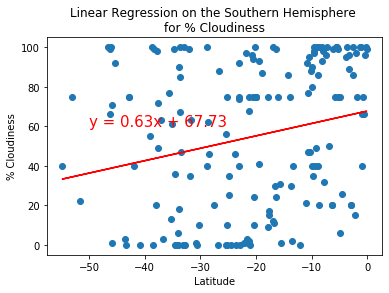

In [43]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))